<a href="https://colab.research.google.com/github/xinyang4O4/MAT421/blob/main/ModuleG_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 21.4 Simpson's Rule

Simpson's Rule - Approximates the area under f(x) over $[x_{i-1},x_i],[x_i,x_{i+1}]$ by fitting a quadratic polynomial through the points $(x_{i-1}, f(x_{i-1})), (x_{i}, f(x_{i})), (x_{i+1}, f(x_{i+1}))$

The accuracy of the Simpson's Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval.

In [1]:
#calculate the answer and error got by Simpson's rule
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


# 21.5 Computing Integrals in Python

The scipy.integrate sub-package has several functions of computing integrals and the trapezoid takes as input arguments an array of function values f computed on a numerical grid x.

In [2]:
import numpy as np
from scipy.integrate import trapezoid #updated from trapz to trapezoid as scipy was updated to 1.14.0

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapezoid(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


When want to compute comulative intergral, we can use cumulative_trapezoid function cumsum, which takes the same input arguments as trapezoid.

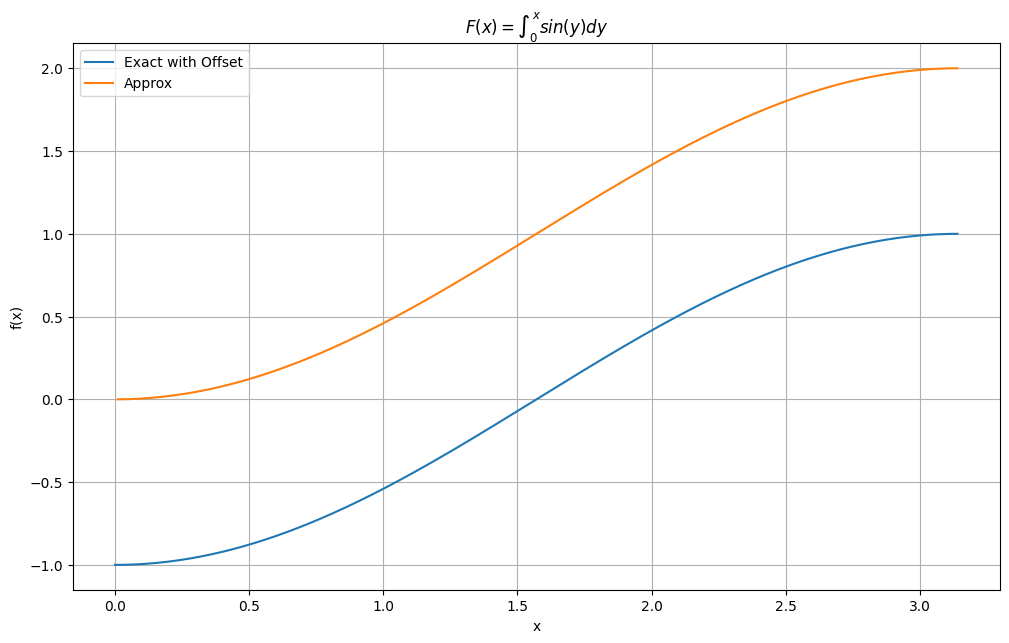

In [3]:
from scipy.integrate import cumulative_trapezoid
import matplotlib.pyplot as plt

%matplotlib inline
x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumulative_trapezoid(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

The quad(f, a, b) function uses a different numerical differentiation scheme to approximate integrals. quad integrates the function defined by the function object, f, from a to b

In [4]:
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
